# 06. Quiz


### 어느 결혼식장에서 피로연의 식수 인원을 올바르게 예측하지 못하여 버려지는 음식으로 고민이 많다고 합니다. 현재까지 진행된 결혼식에 대한 결혼식 참석 인원과 그 중에서 식사를 하는 인원의 데이터가 제공될 때, 아래 각 문항에 대한 코드를 작성하시오.

#### 주의) 사전 작업으로 아래 코드 셀을 먼저 실행하시오

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1) QuizData.csv 파일로부터 데이터를 읽어와서 결혼식 참석 인원 (total), 식수인원(reception)을 각각의 변수로 저장하시오.

In [47]:
dataset = pd.read_csv('./QuizData.csv')
dataset[:5]

,total,reception
0,118,62
1,253,148
2,320,201
3,94,80
4,155,92


In [48]:
total = dataset.iloc[:,:-1].values     # array 형식
total[:5]

array([[118],
       [253],
       [320],
       [ 94],
       [155]])

In [49]:
reception = dataset.iloc[:,-1].values      # series 형식
reception[:5]

array([ 62, 148, 201,  80,  92])

### 2) 전체 데이터를 훈련세트와 테스트 세트로 분리하시오. 이 때 비율은 75:25 로 합니다.
#### (단, random_state = 0으로 설정)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(total, reception, test_size=0.25, random_state=0)

### 3) 훈련 세트를 이용하여 단순 선형회귀(simple linear regression) 모델을 생성하시오.

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
        # X_train : array 형식으로
                # y_train : series 형식으로

LinearRegression()

### 4) 데이터 시각화 (훈련세트) 코드를 작성하시오.

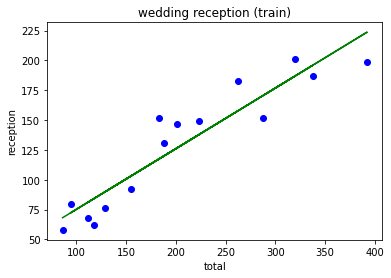

In [69]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, lr.predict(X_train), color='green')
                    # lr.predict(X_train) : 모델을 통해 예측 된 값을 출력해야 한다.
plt.title('wedding reception (train)')
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

### 5) 데이터 시각화 (테스트세트) 코드를 작성하시오.

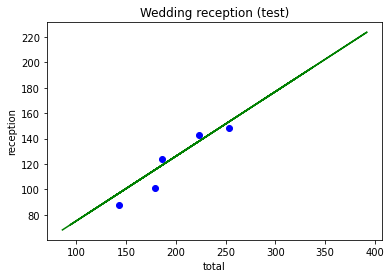

In [53]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, lr.predict(X_train), color='green')       # ?     같은 모델을 가지고 예측하기 때문에 test나 train이나 상관없이 같은 기울기 + 절편임.
                                                            # 그런데 그래프의 크기가 달라진다. >> xlim, ylim을 이용해서 위의 그래프와 비슷하게 잡아주는 방법도 있음.
# plt.plot(X_test, lr.predict(X_test), color='red')
plt.title('Wedding reception (test)')
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

### 6) 훈련세트, 테스트 세트에 대해 각각 모델 평가 점수를 구하시오.

In [54]:
# 훈련 세트 평가 점수
lr.score(X_train, y_train)

0.8707088403321211

In [55]:
# 테스트 세트 평가 점수
lr.score(X_test, y_test)

0.8634953212566615

### 7) 결혼식 참석 인원이 300명일 때 예상되는 식수 인원을 구하시오.

In [71]:
# lr.predict(X=[[300,]])

# UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names 오류
# X 데이터 프레임이 feature name을 가지고 있기 때문에 발생하는 오류.
# X.values 를 해줘야 한다.

print('결혼식 참석 인원 {} 명에 대한 예상 식수 인원은 {} 명입니다.'.format(  300, round(float(lr.predict(X=[[300,]]))) ))
                                                                                                    # [[300]] : total의 모양이 [[value]] 형식
print(f'결혼식 참석 인원 300 명에 대한 예상 식수 인원은 {np.around(lr.predict([[300]])[0]).astype(int)} 명입니다.')

결혼식 참석 인원 300 명에 대한 예상 식수 인원은 177 명입니다.
결혼식 참석 인원 300 명에 대한 예상 식수 인원은 177 명입니다.
